In [26]:
from xcube_sh.sentinelhub import SentinelHub
import shapely.geometry
import IPython.display
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.observers import Observers
import numpy as np
%matplotlib inline

In [27]:
import os
sh_credentials = dict(client_id=os.environ['SH_CLIENT_ID'],
                      client_secret=os.environ['SH_CLIENT_SECRET']) # This is only provided when the Oauth credentials are created

# Sentinel-3 OLCI, Sentinel-3 SLSTR and Sentinel-5 layers are processed on different infrastructure, 
# which requires to used different end-point

sh_credentials.update(api_url='https://creodias.sentinel-hub.com') 

In [28]:
SH = SentinelHub()
SH.dataset_names

['LETML2',
 'S1GRD',
 'LTML2',
 'MODIS',
 'LMSSL1',
 'LOTL1',
 'DEM',
 'S3OLCI',
 'LTML1',
 'LOTL2',
 'S2L1C',
 'S3SLSTR',
 'LETML1',
 'S2L2A',
 'S5PL2',
 'CUSTOM']

In [29]:
SH.band_names('S5PL2')

['O3',
 'NO2',
 'SO2',
 'CO',
 'CH4',
 'HCHO',
 'AER_AI_340_380',
 'AER_AI_354_388',
 'CLOUD_FRACTION',
 'CLOUD_BASE_HEIGHT',
 'CLOUD_BASE_PRESSURE',
 'CLOUD_OPTICAL_THICKNESS',
 'CLOUD_TOP_HEIGHT',
 'CLOUD_TOP_PRESSURE']

In [30]:
x1 = -130  # degree
y1 = 20  # degree
x2 = -70 # degree
y2 = 55 # degree

bbox = x1, y1, x2, y2

In [31]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

In [22]:
spatial_res = 0.0005
abs(bbox[2]-bbox[0])/1024

0.05859375

In [32]:
cube_config = CubeConfig(dataset_name='S5PL2',
                         band_names=['NO2'],
                         tile_size=[512, 512],
                         bbox=bbox,
                         spatial_res=abs(bbox[2]-bbox[0])/1024 ,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_period='3D')

In [33]:
cube = open_cube(cube_config, **sh_credentials)

In [98]:
cube.NO2.isel(time=4).values[0]

array([            nan,             nan,  1.90704850e-06,  1.90704850e-06,
        1.90704850e-06,  1.90704850e-06,  1.90704850e-06,  1.90704850e-06,
        1.90704850e-06,  1.90704850e-06,  1.90704850e-06,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,  2.40843019e-06,
        2.40843019e-06,  2.40843019e-06,  2.40843019e-06,  2.40843019e-06,
        2.40843019e-06,  2.40843019e-06,  2.40843019e-06,  2.40843019e-06,
        2.40843019e-06,  2.40843019e-06,  2.16672720e-06,  2.16999729e-06,
        2.16422177e-06,  2.14953388e-06,  2.12606301e-06,  2.09393647e-06,
        2.05327819e-06,  2.00421005e-06,  1.94685072e-06,  2.40843019e-06,
        2.40843019e-06,  1.21382902e-06,  1.21382902e-06,  1.21382902e-06,
        1.21382902e-06,  1.21382902e-06,  1.21382902e-06,  1.21382902e-06,
        1.21382902e-06,  1.21382902e-06,  1.21382902e-06,  1.21382902e-06,
        1.21382902e-06,  

In [56]:
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 4096, lon: 6144, time: 27)
Coordinates:
  * lat        (lat) float64 46.05 46.05 46.05 46.05 ... 44.0 44.0 44.0 44.0
  * lon        (lon) float64 7.0 7.001 7.001 7.002 ... 10.07 10.07 10.07 10.07
  * time       (time) datetime64[ns] 2018-05-15T12:00:00 ... 2018-08-01T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(27, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    NO2        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2021-06-24T10:45:41.793300
    time_coverage_start:       2018-05-14T00:00:00+00:00
    time_coverage_end:         2018-08-03T00:00:00+00:00
    time_coverage_duration:    P81DT0H0M0S
    time_coverage_resolution:  P3DT0H0M0S
    geospatial_lon_min:        7
    geospatial_lat_min:        44
    geospatial_lon_max:        10.072
    geospatial_lat_max:        46.048

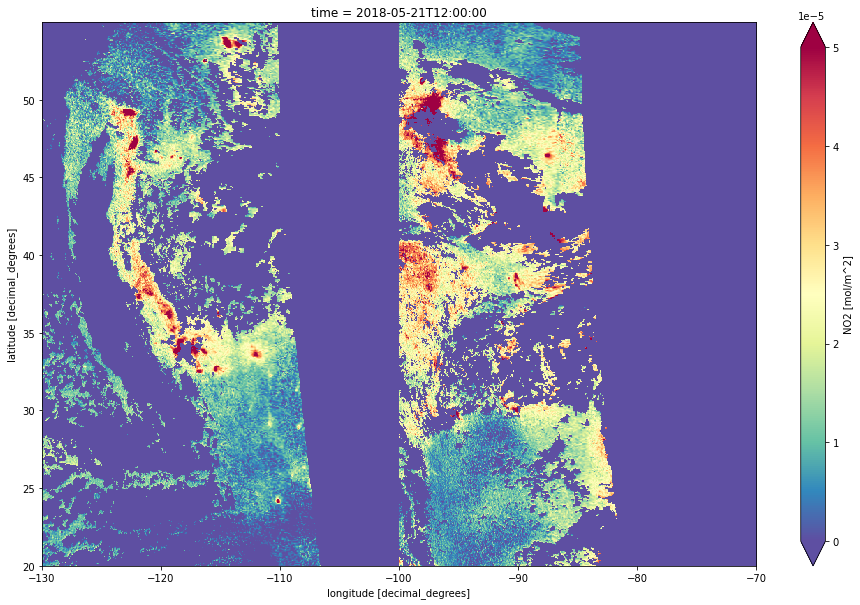

In [40]:
cube.NO2.isel(time=2).fillna(0.0).plot.imshow(vmin=0, vmax= 0.00005, cmap='Spectral_r', figsize=(16, 10))